## Phase 3 Project

##### Student Name:  Terry Thompson
##### Flex Student
##### Teacher: Morgan Jones

## Business Understanding:
##### This project is to determine the effectiveness of Terry Stops and to predict whether or not a Terry Stop resulted in an arrest.  For this project I selected the Terry Stops report from the City of Seattle Open Data website (https://data.seattle.gov/Public-Safety/Terry-Stops/28ny-9ts8).  The data will need to be cleaned and explored to make accurate decisions.

## Exploring the Data
##### Here we will import the necessary tools, and start looking at the information.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
sns.set(style='white')
%matplotlib inline
from scipy import stats
plt.style.use("ggplot")

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import DataConversionWarning
from datetime import datetime
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Terry_Stops.csv')
df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,-,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,...,11:32:00.0000000,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
1,-,-1,20150000001463,28806,Field Contact,None,5670,1965,M,White,...,07:59:00.0000000,-,-,-,NaN,N,N,-,-,-
2,-,-1,20150000001516,29599,Field Contact,None,4844,1961,M,White,...,19:12:00.0000000,-,-,-,NaN,N,-,-,-,-
3,-,-1,20150000001670,32260,Field Contact,None,7539,1963,M,White,...,04:55:00.0000000,-,-,-,NaN,N,N,-,-,-
4,-,-1,20150000001739,33155,Field Contact,None,6973,1977,M,White,...,00:41:00.0000000,-,-,-,NaN,N,N,-,-,-


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52828 entries, 0 to 52827
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         52828 non-null  object
 1   Subject ID                52828 non-null  int64 
 2   GO / SC Num               52828 non-null  int64 
 3   Terry Stop ID             52828 non-null  int64 
 4   Stop Resolution           52828 non-null  object
 5   Weapon Type               52828 non-null  object
 6   Officer ID                52828 non-null  object
 7   Officer YOB               52828 non-null  int64 
 8   Officer Gender            52828 non-null  object
 9   Officer Race              52828 non-null  object
 10  Subject Perceived Race    52828 non-null  object
 11  Subject Perceived Gender  52828 non-null  object
 12  Reported Date             52828 non-null  object
 13  Reported Time             52828 non-null  object
 14  Initial Call Type     

####  There are 23 columns in the dataset.  Below are definitions of the column names.

Subject Age Group: Subject Age Group (10 year increments) as reported by the officer.

Subject ID: Key, generated daily, identifying unique subjects in the dataset using a character to character match of first name and last name. "Null" values indicate an "anonymous" or "unidentified" subject. Subjects of a Terry Stop are not required to present identification.

GO/SC Num: General Offense or Street Check number, relating the Terry Stop to the parent report. This field may have a one to many relationship in the data.

Terry Stop ID: Key identifying unique Terry Stop reports.

Stop Resolution: Resolution of the stop as reported by the officer.

Weapon Type: Type of weapon, if any, identified during a search or frisk of the subject. Indicates "None" if no weapons was found.

Officer ID: Key identifying unique officers in the dataset.

Officer YOB: Year of birth, as reported by the officer.

Officer Gender: Gender of the officer, as reported by the officer.

Officer Race: Race of the officer, as reported by the officer.

Subject Perceived Race: Perceived race of the subject, as reported by the officer.

Subject Perceived Gender: Perceived gender of the subject, as reported by the officer.  

Reported Date: Date the report was filed in the Records Management System (RMS). Not necessarily the date the stop occurred but generally within 1 day.

Reported Time: Time the stop was reported in the Records Management System (RMS). Not the time the stop occurred but generally within 10 hours.

Initial Call Type: Initial classification of the call as assigned by 911.

Final Call Type: Final classification of the call as assigned by the primary officer closing the event.

Call Type: How the call was received by the communication center.

Officer Squad: Functional squad assignment (not budget) of the officer as reported by the Data Analytics Platform (DAP).

Arrest Flag: Indicator of whether a "physical arrest" was made, of the subject, during the Terry Stop. Does not necessarily reflect a report of an arrest in the Records Management System (RMS).

Frisk Flag: Indicator of whether a "frisk" was conducted, by the officer, of the subject, during the Terry Stop.

Precinct: Precinct of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.

Sector: Sector of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.

Beat: Beat of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.

## Data Preparation
##### We will now start cleaning the data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52828 entries, 0 to 52827
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         52828 non-null  object
 1   Subject ID                52828 non-null  int64 
 2   GO / SC Num               52828 non-null  int64 
 3   Terry Stop ID             52828 non-null  int64 
 4   Stop Resolution           52828 non-null  object
 5   Weapon Type               52828 non-null  object
 6   Officer ID                52828 non-null  object
 7   Officer YOB               52828 non-null  int64 
 8   Officer Gender            52828 non-null  object
 9   Officer Race              52828 non-null  object
 10  Subject Perceived Race    52828 non-null  object
 11  Subject Perceived Gender  52828 non-null  object
 12  Reported Date             52828 non-null  object
 13  Reported Time             52828 non-null  object
 14  Initial Call Type     

In [5]:
print('#Rows, #Cols :',df.shape,'\n')
print(df.isna().sum())

#Rows, #Cols : (52828, 23) 

Subject Age Group             0
Subject ID                    0
GO / SC Num                   0
Terry Stop ID                 0
Stop Resolution               0
Weapon Type                   0
Officer ID                    0
Officer YOB                   0
Officer Gender                0
Officer Race                  0
Subject Perceived Race        0
Subject Perceived Gender      0
Reported Date                 0
Reported Time                 0
Initial Call Type             0
Final Call Type               0
Call Type                     0
Officer Squad               486
Arrest Flag                   0
Frisk Flag                    0
Precinct                      0
Sector                        0
Beat                          0
dtype: int64


##### Here we see that Officer Squad has 486 null values.  We will drop this column later along with other unnecessary columns.  We will now look at Stop Resolution.  The goal is to see which stops resulted in arrest (1) and which ones did not (0).

In [6]:
df['Stop Resolution'].unique()

array(['Arrest', 'Field Contact', 'Citation / Infraction',
       'Offense Report', 'Referred for Prosecution'], dtype=object)

In [7]:
df['Stop Resolution'] = df['Stop Resolution'].map({'Arrest': 1, 'Field Contact': 0,'Offense Report': 0,
                                                   'Referred for Prosecution': 0,'Citation / Infraction': 0})
df['Stop Resolution'].value_counts()

0    39858
1    12970
Name: Stop Resolution, dtype: int64

##### Here we can see that roughly one fourth of all encounters result in arrest.  Later we will look at which stops result in arrest during the stop, and which ones happen as a result of the stops after the stop.  We will now look at the weapons and if they play a role in the arrests.

In [8]:
df['Weapon Type'].unique()

array(['None', 'Firearm Other', 'Lethal Cutting Instrument', 'Handgun',
       '-', 'Club, Blackjack, Brass Knuckles',
       'Knife/Cutting/Stabbing Instrument', 'Other Firearm', 'Rifle',
       'Fire/Incendiary Device', 'Blunt Object/Striking Implement',
       'Firearm (unk type)', 'Mace/Pepper Spray', 'None/Not Applicable',
       'Firearm', 'Club', 'Shotgun', 'Taser/Stun Gun', 'Brass Knuckles',
       'Automatic Handgun', 'Blackjack',
       'Personal Weapons (hands, feet, etc.)'], dtype=object)

In [9]:
df['Weapon Type'] = df['Weapon Type'].map({'None': 'None', 'Firearm Other': 'Firearm', 'Lethal Cutting Instrument': 'Not Firearm',
                                           'Handgun': 'Firearm', 
                                           'Club, Blackjack, Brass Knuckles': 'Not Firearm',
                                           'Knife/Cutting/Stabbing Instrument': 'Not Firearm',
                                           'Other Firearm': 'Firearm', 'Rifle': 'Firearm', 'Fire/Incendiary Device':'Not Firearm',
                                           '-': 'None', 'Blunt Object/Striking Implement': 'Not Firearm',
                                           'Firearm (unk type)': 'Firearm', 'Mace/Pepper Spray': 'Not Firearm',
                                           'None/Not Applicable': 'None', 'Firearm': 'Firearm', 'Club': 'Not Firearm',
                                           'Shotgun': 'Firearm', 'Taser/Stun Gun': 'Not Firearm', 'Brass Knuckles': 'Not Firearm',
                                           'Automatic Handgun': 'Firearm', 'Blackjack': 'Not Firearm',
                                           'Personal Weapons (hands, feet, etc.)': 'None'})
df['Weapon Type'].value_counts()

None           49620
Not Firearm     2647
Firearm          561
Name: Weapon Type, dtype: int64

##### Here we see 3208 subjects are found with weapons.  This makes up approximately 6% of the total stops.  Guns are found at just above 1% of the time during the stops.

#####  I will now focus on cleaning the data regarding the officers and their demographics.   Throughout the cleaning process we will augment the data to be useable.  

In [10]:
df['Officer Age'] = 2022-df['Officer YOB']
df['Officer Age'].head()

0    38
1    57
2    61
3    59
4    45
Name: Officer Age, dtype: int64

In [11]:
df['Officer Age'].unique()

array([ 38,  57,  61,  59,  45,  49,  37,  36,  58,  63,  43,  41,  53,
        39,  56,  54,  35,  70,  52,  46,  50,  40,  31,  34,  51,  44,
        32,  47,  55,  30,  60,  42,  74,  33,  69,  48,  62,  64,  28,
        29,  26, 122,  27,  25,  24,  23,  65,  67,  68,  66,  76,  73,
        22,  71], dtype=int64)

##### Here we see an outlier that doesn't make sense.  We will remove it.

In [12]:
df['Officer Age'] = df['Officer Age'].clip(upper = 74)

In [13]:
df['Officer Race'].unique()

array(['Black or African American', 'White', 'Hispanic or Latino',
       'Asian', 'American Indian/Alaska Native', 'Two or More Races',
       'Not Specified', 'Nat Hawaiian/Oth Pac Islander', 'Unknown'],
      dtype=object)

In [14]:
df['Officer Race'].value_counts()

White                            38838
Two or More Races                 3257
Hispanic or Latino                3207
Asian                             2342
Not Specified                     2214
Black or African American         2111
Nat Hawaiian/Oth Pac Islander      484
American Indian/Alaska Native      332
Unknown                             43
Name: Officer Race, dtype: int64

In [15]:
df.replace({'Officer Race': {'Unknown': 'Not Specified'}}, inplace = True)

In [16]:
df['Officer Race'].value_counts()

White                            38838
Two or More Races                 3257
Hispanic or Latino                3207
Asian                             2342
Not Specified                     2257
Black or African American         2111
Nat Hawaiian/Oth Pac Islander      484
American Indian/Alaska Native      332
Name: Officer Race, dtype: int64

##### Here we see that the predominant race of officers is white.  

In [17]:
df['Officer Gender'].value_counts()

M    46767
F     6031
N       30
Name: Officer Gender, dtype: int64

##### Here we see that the predominant gender of officers is male.

###### We will now focus on cleaning the subjects' perceived races.  All groups that are unknown will be assessed as "Other".

In [18]:
df['Subject Perceived Race'].unique()

array(['Asian', '-', 'White', 'Black or African American', 'Other',
       'Unknown', 'American Indian or Alaska Native', 'Hispanic',
       'Multi-Racial', 'Native Hawaiian or Other Pacific Islander'],
      dtype=object)

In [19]:
df['Subject Perceived Race'].value_counts()

White                                        25879
Black or African American                    15712
Unknown                                       3428
-                                             1809
Asian                                         1768
Hispanic                                      1684
American Indian or Alaska Native              1495
Multi-Racial                                   809
Other                                          152
Native Hawaiian or Other Pacific Islander       92
Name: Subject Perceived Race, dtype: int64

In [20]:
df.replace({'Subject Perceived Race': {'-': 'Other', 'Unknown': 'Other'}}, inplace = True)

In [21]:
df['Subject Perceived Race'].value_counts()

White                                        25879
Black or African American                    15712
Other                                         5389
Asian                                         1768
Hispanic                                      1684
American Indian or Alaska Native              1495
Multi-Racial                                   809
Native Hawaiian or Other Pacific Islander       92
Name: Subject Perceived Race, dtype: int64

In [22]:
df['Subject Perceived Gender'].value_counts()

Male                                                         41575
Female                                                       10606
Unable to Determine                                            326
-                                                              238
Unknown                                                         65
Gender Diverse (gender non-conforming and/or transgender)       18
Name: Subject Perceived Gender, dtype: int64

In [23]:
df.replace({'Subject Perceived Gender': {'-': 'Unknown', 'Unable to Determine': 'Unknown'}}, inplace = True)

In [24]:
df['Subject Perceived Gender'].value_counts()

Male                                                         41575
Female                                                       10606
Unknown                                                        629
Gender Diverse (gender non-conforming and/or transgender)       18
Name: Subject Perceived Gender, dtype: int64

#### Here we will look at Frisk and Arrest data.  I will have to make the assumption that a '-' means they did not frisk the subject.

In [25]:
df['Frisk Flag'].unique()

array(['N', '-', 'Y'], dtype=object)

In [26]:
df['Frisk Flag'].value_counts()

N    40182
Y    12168
-      478
Name: Frisk Flag, dtype: int64

In [27]:
df.replace({'Frisk Flag': {'-': 'N'}}, inplace = True)
df['Frisk Flag'].value_counts()

N    40660
Y    12168
Name: Frisk Flag, dtype: int64

In [28]:
df['Arrest Flag'].value_counts()

N    48066
Y     4762
Name: Arrest Flag, dtype: int64

## Data Understanding

##### Now that we have cleaned the data, we will look at the total arrests made.

In [29]:
df['Reported Date'] = pd.to_datetime(df['Reported Date'])
df['Month'] = df['Reported Date'].dt.month.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',
                                                8:'August',9:'September',10:'October',11:'November',12:'December'})
df['Day'] = df['Reported Date'].dt.day
df['Year'] = df['Reported Date'].dt.year

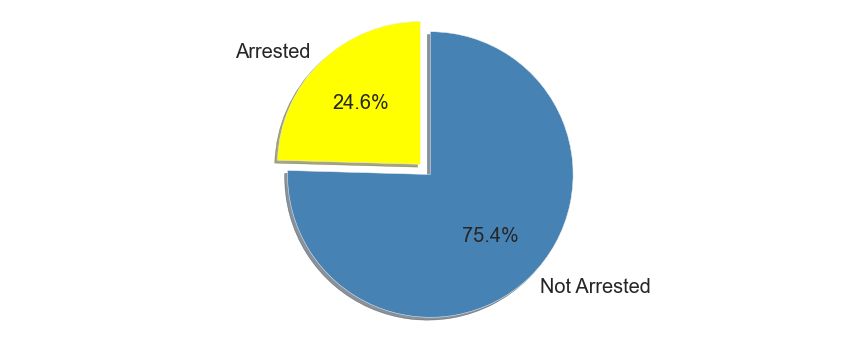

In [30]:
labels = 'Arrested', 'Not Arrested'
sizes = [df['Stop Resolution'].sum(), (len(df['Stop Resolution'])-df['Stop Resolution'].sum())]
explode = (0.1, 0) 

fig1, ax1 = plt.subplots(figsize=(15,6))
ax1.pie(sizes, explode=explode, colors = ['Yellow','Steelblue'],labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 20})
ax1.axis('equal')
plt.show();

##### Here we see that 24.6% of all Terry Stops result in arrest.  This does not mean that all of the arrests were made during the stops.  We will now look at the arrest breakdowns.

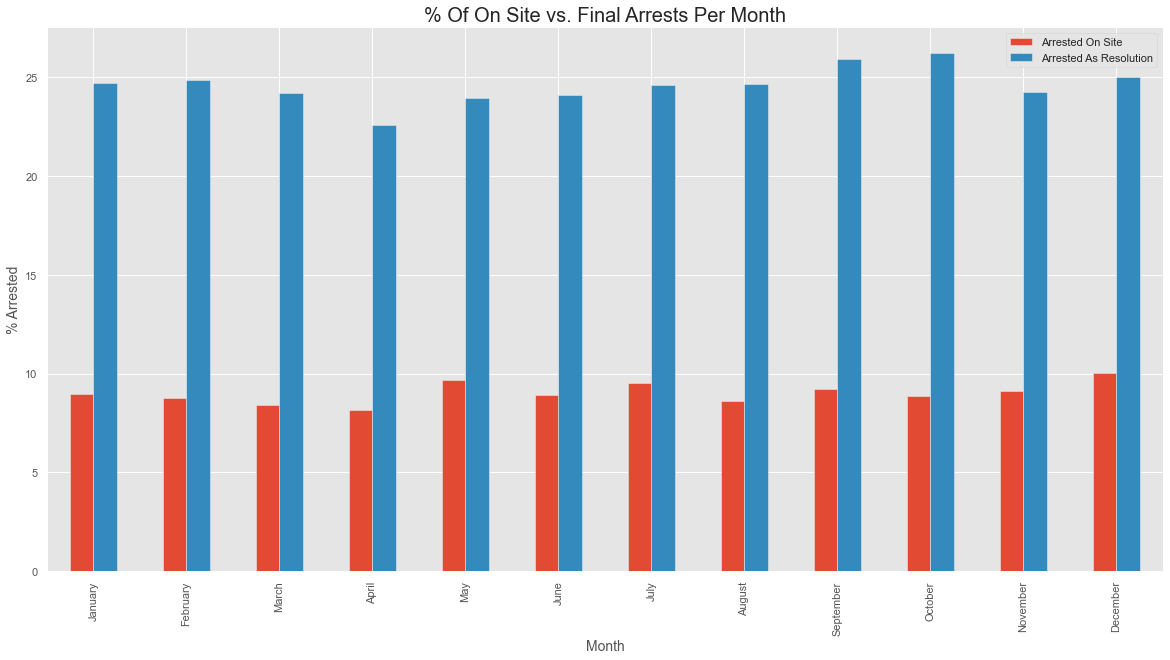

In [31]:
yes_arrest = df[df['Arrest Flag']=='Y']

percent_yes= (yes_arrest['Arrest Flag'].groupby(df['Month']).count() / 
              df['Arrest Flag'].groupby(df['Month']).count())*100

percent_yes = percent_yes.reindex(["January", "February", "March","April","May","June","July",
                                   "August","September","October","November","December"])

percent_yes = pd.DataFrame(percent_yes)

yes_arrest_resolution = df[df['Stop Resolution']==1]
percent_yes_resolution = (yes_arrest_resolution['Stop Resolution'].groupby(df['Month']).count() / 
                     df['Stop Resolution'].groupby(df['Month']).count())*100
percent_yes_final = percent_yes_resolution.reindex(["January", "February", "March","April","May","June","July",
                                                         "August","September","October","November","December"])
percent_yes_final = pd.DataFrame(percent_yes_final)

combined_percent_yes = pd.concat([percent_yes,percent_yes_final],axis=1)
combined_percent_yes.reset_index(inplace=True)

combined_percent_yes.plot(x='Month',y=["Arrest Flag","Stop Resolution"],kind="bar",figsize=(20,10))
plt.title('% Of On Site vs. Final Arrests Per Month', fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('% Arrested', fontsize=14)
plt.legend(labels=['Arrested On Site','Arrested As Resolution']);

##### Here we can see that the larger portion of arrests occur after the Terry Stops.  The amount of arrests that occur at the time make up approximately 9% of the arrests.

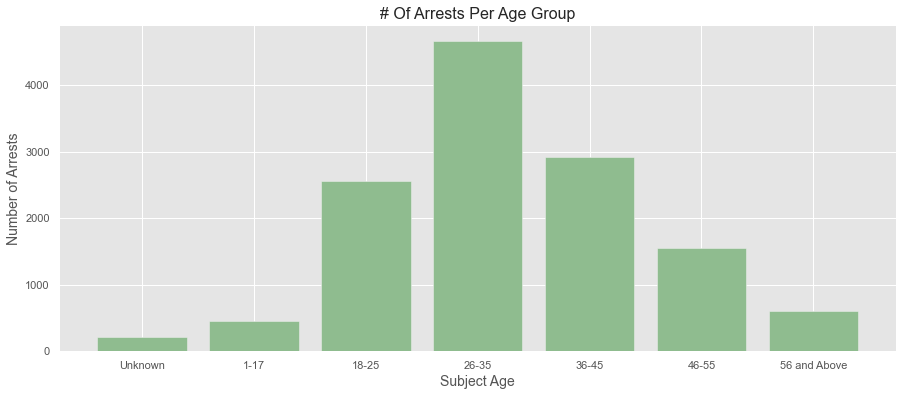

In [32]:
age_ranges = ['Unknown','1-17','18-25','26-35','36-45','46-55','56 and Above']

data_plot = df['Stop Resolution'].groupby(df['Subject Age Group']).sum()

plt.figure(figsize=(15,6))
plt.bar(age_ranges, data_plot, color='darkseagreen')
plt.xlabel("Subject Age",fontsize=14)
plt.ylabel("Number of Arrests",fontsize=14)
plt.title('# Of Arrests Per Age Group', fontdict={'fontsize': 16})
plt.show()

##### Here we can see that the largest group of subjects arrested are in the 26-35 year old category.  We will now look at how many of the stops found weapons.

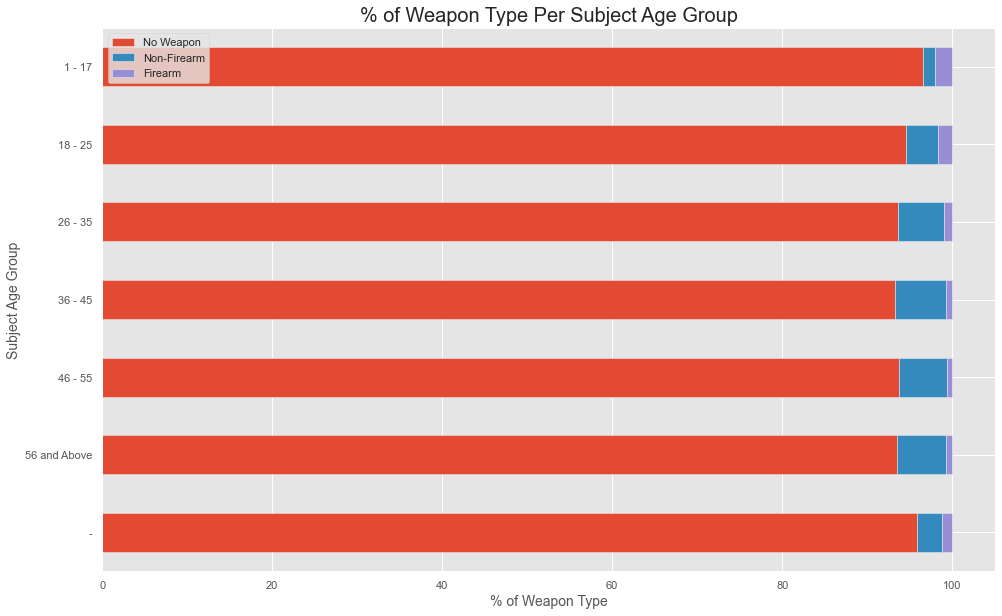

In [33]:
no_weapon = df[df['Weapon Type']=='None']

no_weapon_grouped = (no_weapon['Weapon Type'].groupby(df['Subject Age Group']).count() / 
                     df['Weapon Type'].groupby(df['Subject Age Group']).count())*100

no_weapon_grouped = no_weapon_grouped.reindex(["1 - 17", "18 - 25", "26 - 35","36 - 45","46 - 55","56 and Above","-"])
no_weapon_final = pd.DataFrame(no_weapon_grouped)

firearm = df[df['Weapon Type']=='Firearm']
firearm_grouped = (firearm['Weapon Type'].groupby(df['Subject Age Group']).count() / 
                   df['Weapon Type'].groupby(df['Subject Age Group']).count())*100
firearm_grouped = firearm_grouped.reindex(["1 - 17", "18 - 25", "26 - 35","36 - 45","46 - 55","56 and Above","-"])
firearm_final = pd.DataFrame(firearm_grouped)

non_firearm = df[df['Weapon Type']=='Not Firearm']
non_firearm_grouped = (non_firearm['Weapon Type'].groupby(df['Subject Age Group']).count() /
                       df['Weapon Type'].groupby(df['Subject Age Group']).count())*100
non_firearm_grouped = non_firearm_grouped.reindex(["1 - 17", "18 - 25", "26 - 35","36 - 45","46 - 55",
                                                   "56 and Above","-"])
non_firearm_final = pd.DataFrame(non_firearm_grouped)

combined_weapon = pd.concat([no_weapon_final,non_firearm_final,firearm_final],axis=1)
combined_weapon.reset_index(inplace=True)

combined_weapon.plot(x='Subject Age Group',y="Weapon Type",kind="barh",stacked=True,figsize=(16,10))
plt.gca().invert_yaxis()

plt.title('% of Weapon Type Per Subject Age Group', fontsize=20)
plt.xlabel('% of Weapon Type', fontsize=14)
plt.ylabel('Subject Age Group', fontsize=14)
plt.legend(labels=['No Weapon','Non-Firearm','Firearm']);

##### Here we see that the bulk of stops found no weapons.  However, in the 26-35 and 36-45 year old age groups were found with the most weapons.

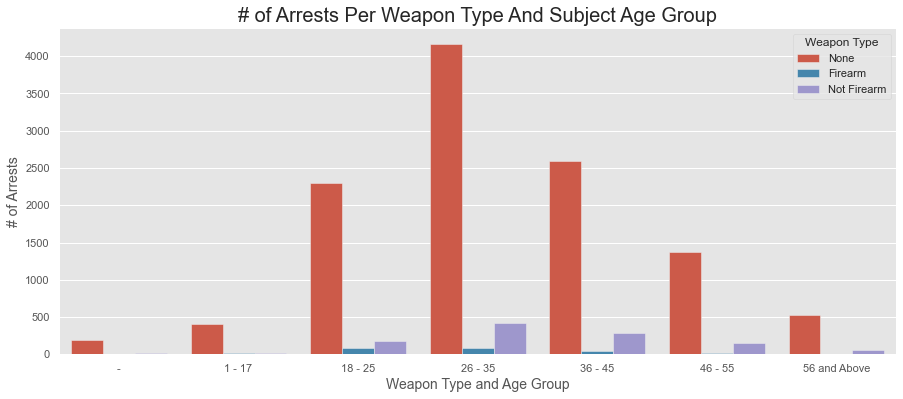

In [34]:
plt.figure(figsize=(15,6))
arrested = df[df['Stop Resolution']==1]
sns.countplot(data=arrested,x='Subject Age Group',hue='Weapon Type')

plt.title('# of Arrests Per Weapon Type And Subject Age Group', fontsize=20)
plt.xlabel('Weapon Type and Age Group', fontsize=14)
plt.ylabel('# of Arrests', fontsize=14);

#### Here we see that the age group of 26-35 make up a much larger percentage group of people arrested.  We can also see that of the groups, the 26-35 age range, 36-45 age range, and the 18-25 age range groups have more weapons than the rest of the groups.  

# of Female vs. Male officers 
 M    46767
F     6031
Name: Officer Gender, dtype: int64


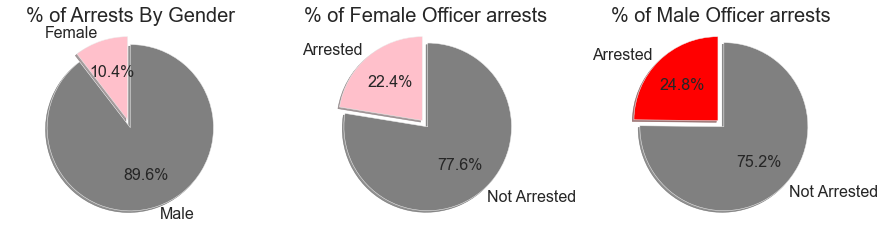

In [35]:
df = df[df['Officer Gender'] != 'N']

labels_tot = 'Female', 'Male'
sizes_tot = [yes_arrest_resolution[yes_arrest_resolution['Officer Gender']=='F']['Officer Gender'].count(),
          yes_arrest_resolution[yes_arrest_resolution['Officer Gender']=='M']['Officer Gender'].count()]

labels_F = 'Arrested', 'Not Arrested'
sizes_F = [df[df['Officer Gender']=='F']['Stop Resolution'].sum(),
          (len(df[df['Officer Gender']=='F'])-df[df['Officer Gender']=='F']['Stop Resolution'].sum())]

labels_M = 'Arrested', 'Not Arrested'
sizes_M = [df[df['Officer Gender']=='M']['Stop Resolution'].sum(),
          (len(df[df['Officer Gender']=='M'])-df[df['Officer Gender']=='M']['Stop Resolution'].sum())]

print('# of Female vs. Male officers',"\n",df['Officer Gender'].value_counts())

fig = plt.figure(figsize=(15,12))
explode = (0.1, 0)  

ax1 = plt.subplot(331)
ax1.pie(sizes_tot, explode=explode, colors = ['Pink','Grey'],labels=labels_tot, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 16})
ax1.axis('equal')  
ax1.set_title('% of Arrests By Gender', fontsize=20)

ax2 = plt.subplot(332)
ax2.pie(sizes_F, explode=explode, colors = ['Pink','Grey'],labels=labels_F, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 16})
ax2.axis('equal')  
ax2.set_title('% of Female Officer arrests', fontsize=20)

ax3 = plt.subplot(333)
ax3.pie(sizes_M, explode=explode, colors = ['Red','Grey'],labels=labels_M, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 16})
ax3.axis('equal') 
ax3.set_title('% of Male Officer arrests', fontsize=20)
plt.show();

##### Here we can see that 10.4% of the arrests made were female and 89.6% were male.  We can also see that the arrests rates between male and female officers are similar.

In [36]:
precinct = df[df['Stop Resolution']==1]
precinct_grouped = (precinct['Stop Resolution'].groupby(df['Precinct']).count() / 
                   df['Stop Resolution'].groupby(df['Precinct']).count())*100
precinct_final = pd.DataFrame(precinct_grouped)
precinct_final

precinct1 = df[df['Stop Resolution']==0]
precinct_grouped1 = (precinct1['Stop Resolution'].groupby(df['Precinct']).count() / 
                   df['Stop Resolution'].groupby(df['Precinct']).count())*100
precinct_final1 = pd.DataFrame(precinct_grouped1)
precinct_final1

combined_precinct = pd.concat([df['Precinct'].value_counts(),precinct_final,precinct_final1],axis=1)
combined_precinct.columns =['# of Terry Stops', '% Arrested','% Not Arrested']
combined_precinct

,# of Terry Stops,% Arrested,% Not Arrested
West,13690,32.300950,67.699050
North,11528,25.069396,74.930604
-,10196,3.177717,96.822283
East,6824,33.118406,66.881594
South,6255,31.638689,68.361311
Southwest,2320,23.836207,76.163793
SouthWest,1704,28.051643,71.948357
Unknown,200,25.500000,74.500000
OOJ,59,8.474576,91.525424
FK ERROR,22,18.181818,81.818182


##### Here we can see that the West Precint made the most Terry Stops, followed by the North and Unknown precincts.

In [37]:
df.drop(columns=['Subject ID','GO / SC Num','Officer ID','Officer YOB','Officer Race',
                'Subject Perceived Gender','Subject Perceived Race','Reported Date','Reported Time','Call Type',
                'Officer Squad', 'Sector','Beat','Initial Call Type','Final Call Type','Day'],axis=1, inplace=True)

## Modeling

In [38]:
X = df.loc[:, ['Subject Age Group', 'Weapon Type', 'Arrest Flag', 'Frisk Flag','Precinct','Month',
               'Year','Officer Age', 'Officer Gender']]
y = df.loc[:, 'Stop Resolution']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

In [39]:
ohe = OneHotEncoder()
ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train).toarray()
X_test_ohe = ohe.transform(X_test).toarray()
ohe_df1 = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(X_train.columns))
ohe_df2 = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names(X_test.columns))
ohe_df = pd.concat([ohe_df1,ohe_df2])

In [40]:
def confusion_matrix_plot(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
        
    plt.colorbar()
    plt.show()
    
class_names = ['Arrested','Not Arrested']

## Evaluation

##### I chose the Decision Tree Classifier because it is a good starter.  This will allow me to build the first model without exerting a large amount of processing power.

In [41]:
dtree = DecisionTreeClassifier()

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(1,10),
    "min_samples_split": range(2,10)
}
gs_tree = GridSearchCV(dtree, param_grid, cv=5, n_jobs=-1)

gs_tree.fit(X_train_ohe, y_train)

print(gs_tree.best_params_)

{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}


Decision Tree Accuracy:  84.21717171717171 %
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     11936
           1       1.00      0.36      0.53      3904

    accuracy                           0.84     15840
   macro avg       0.91      0.68      0.72     15840
weighted avg       0.87      0.84      0.81     15840



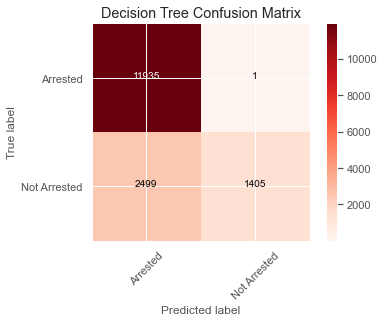

In [42]:
d_tree = DecisionTreeClassifier(criterion='gini',max_depth=1,min_samples_split=2)
d_tree = d_tree.fit(X_train_ohe, y_train)
y_pred = d_tree.predict(X_test_ohe)

print('Decision Tree Accuracy: ', accuracy_score(y_test, y_pred)*100,'%')

print(classification_report(y_test, y_pred))

cm_dtree = confusion_matrix(y_test,y_pred)
confusion_matrix_plot(cm_dtree, classes=class_names, title='Decision Tree Confusion Matrix')

##### I chose K Nearest Neighbor for the next model, as it produces highly accurate information.

In [43]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    '''This function will determine which k value is optimal to use for knn classification by selecting the k value
    with the highest overall accuracy score.'''
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1,2):
        knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        accuracy = accuracy_score(y_test, preds)
        if accuracy > best_score:
            best_k = k
            best_score = accuracy
    
    print("Best Value for k: {}".format(best_k))
    print("Accuracy Score: {}".format(best_score))
    
print(find_best_k(X_train_ohe, y_train, X_test_ohe, y_test))

Best Value for k: 25
Accuracy Score: 0.8422348484848485
None


KNN Accuracy:  84.22348484848486 %
              precision    recall  f1-score   support

           0       0.83      0.99      0.90     11936
           1       0.90      0.40      0.56      3904

    accuracy                           0.84     15840
   macro avg       0.87      0.69      0.73     15840
weighted avg       0.85      0.84      0.82     15840



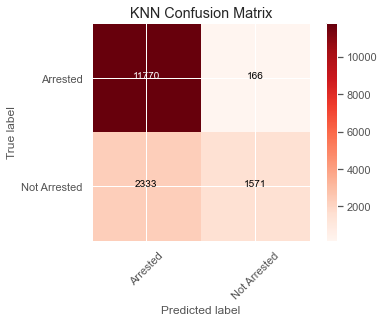

In [44]:
knn = KNeighborsClassifier(n_neighbors = 25, algorithm='brute')
knn.fit(X_train_ohe, y_train)
y_pred = knn.predict(X_test_ohe)

print('KNN Accuracy: ', accuracy_score(y_test, y_pred)*100,'%')

print(classification_report(y_test, y_pred))

cm_knn = confusion_matrix(y_test,y_pred)
confusion_matrix_plot(cm_knn, classes=class_names, title='KNN Confusion Matrix')

##### For the next model, I used a logistic regression, because it is very efficient to train.

Logistic Regression Accuracy:  84.1919191919192 %
              precision    recall  f1-score   support

           0       0.83      0.99      0.90     11936
           1       0.90      0.40      0.56      3904

    accuracy                           0.84     15840
   macro avg       0.87      0.69      0.73     15840
weighted avg       0.85      0.84      0.82     15840



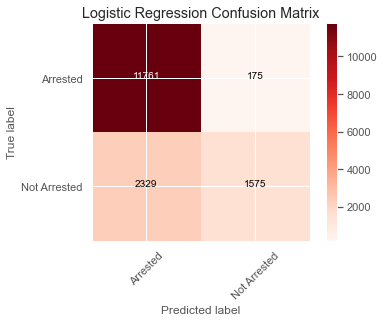

In [45]:
logreg = LogisticRegression()
logreg.fit(X_train_ohe, y_train)
y_pred = logreg.predict(X_test_ohe)

print('Logistic Regression Accuracy: ', accuracy_score(y_test, y_pred)*100,'%')

print(classification_report(y_test, y_pred))

cm_LR = confusion_matrix(y_test,y_pred)
confusion_matrix_plot(cm_LR, classes=class_names, title='Logistic Regression Confusion Matrix')

##### Finally, I selected the Random Forest Classifier, because it is very accurate.

In [46]:
forest = RandomForestClassifier()
       
param_grid = {'n_estimators': [80, 100, 120],
              'criterion': ['gini', 'entropy'],
              'max_depth' : [None],
              'max_features': range(1,11), 
              'min_samples_split': range(1,6)}
forest_grid_search = GridSearchCV(forest, param_grid, cv=5, n_jobs=-1)

forest_grid_search.fit(X_train_ohe, y_train)

print(forest_grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 100}


Random Forest Accuracy:  85.05681818181819 %
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     11936
           1       0.82      0.50      0.62      3904

    accuracy                           0.85     15840
   macro avg       0.84      0.73      0.77     15840
weighted avg       0.85      0.85      0.84     15840



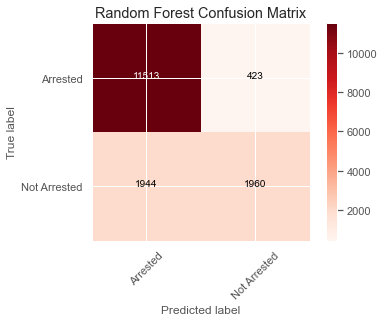

In [47]:
rforest = RandomForestClassifier(n_estimators=80, criterion = 'gini',max_depth=None, max_features=5, 
                                 min_samples_split=5)
rforest.fit(X_train_ohe, y_train)
y_pred = rforest.predict(X_test_ohe)

print('Random Forest Accuracy: ', accuracy_score(y_test, y_pred)*100,'%')

print(classification_report(y_test, y_pred))

cm_forest = confusion_matrix(y_test,y_pred)
confusion_matrix_plot(cm_forest, classes=class_names, title='Random Forest Confusion Matrix')

##### Now that we have ran our models, we can see the accuracy of all of them:
###### - Decision Tree: 84.22%
###### - KNN: 84.22%
###### - Logistic Regression: 84.19%
###### - Random Forest: 84.78%
##### All of the models performed very close to each other, however, the Random Forest is the most accurate.  We will now look at the most influential categories to the Random Forest.

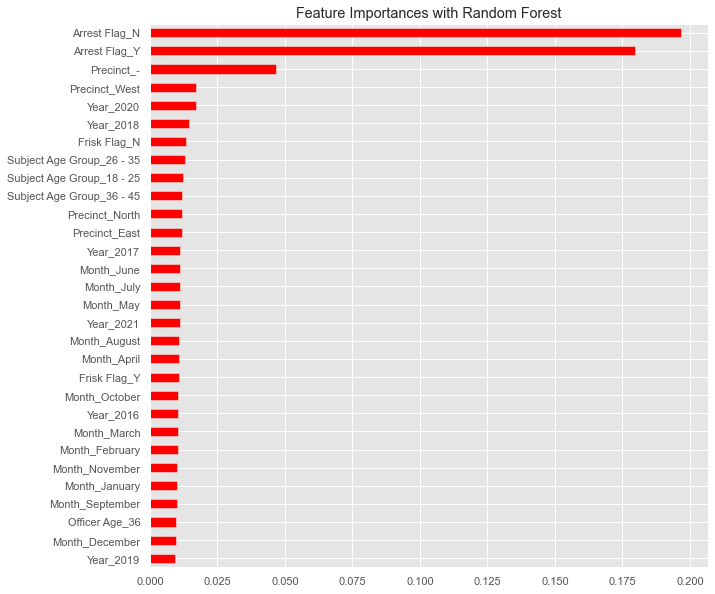

In [48]:
influential_features = pd.Series(rforest.feature_importances_, index=ohe_df.columns)
influential_features.nlargest(30).sort_values().plot(kind='barh', color='Red', figsize=(10,10))
plt.title('Feature Importances with Random Forest');

## Conclusion

#####  Here we see that the most influential categories to the Random Forest is Arrest Flag yes, Arrest Flag no, and the Unknown Precinct.
##### The models were all very close in accuracy, but the Random Forest is the most accurate, being able to predict arrest 84.78% of the time.

### Recommendations:
##### Train officers to fill out paperwork thoroughly.  The best model predicts roughly 85% of the data.  Better percentages could be achieved by filling out the paperwork properly, such as filling in the blanks that correspond to Frisk Flag and Precinct.  
##### Train officers to know when to enact a Terry Stop.  A large portion of stops do not yield arrests at the time of the stop, nor do they yield a significant amount of weapons confiscated.  

### Next steps:
###### While 85% prediction is a decent percentage, it could be improved upon by tuning the model.  On another note, I would like to research further the demographics of who is being stopped, and who is doing the stopping.  